# Mining Netflix 

According to [Wikipedia](https://en.m.wikipedia.org/wiki/Netflix), Netflix, Inc. is an American media-services provider and production company headquartered in Los Gatos, California, founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. The company's primary business is its subscription-based streaming service which offers online streaming of a library of films and television programs, including those produced in-house.As of April 2019, Netflix had over 148 million paid subscriptions worldwide, including 60 million in the United States, and over 154 million subscriptions total including free trials.

While Netflix was launched in India few years ago,keeping in mind the largest internet and smartphone market,inorder to expand its customer base to tire 1 and tire 2 cities ,it launched its first mobile only subscription plan of Rs.199/USD 2.81 per month.India is the only market where Netflix has launched this mobile only plan.The base netflix plan in India costs around Rs.499/USD 7.04 per month - the most expensive compared to Amazon prime (Rs.129/USD 1.82 per month) and Hotstar(Rs.299/USD 4.22 per month).

The content library of Netflix is one of the most outstanding and has appeal to all sections of people.Also, the streaming quality,the advantages of binge-watching,ever rising price of movie tickes(and popcorns!!!) are some of the reasons for the people to prefer OTT platforms like Netflix.

The data provided here lists movies and TV shows found in Netflix along with their cast,rating and other details.We will explore this content and mine interesting insights.

### Loading the library and  data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

In [15]:
kaggle=0

if kaggle==0:
    data=pd.read_csv('../data/netflix_titles_nov_2019.csv')
else:
    data=pd.read_csv('../input/netflix-shows/netflix_titles_nov_2019.csv')

## Summary of the data

In [16]:
data.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [17]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns')

There are 5837 rows and 12 columns


In [18]:
data.dtypes

show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object

In [19]:
### Checking the null values:

data.isnull().any()

show_id         False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
type            False
dtype: bool

* From the above datatype description we see that the release_year is of integer type,date added is object type whose datatype should have been date .
* When we check the null values , we see that there are 5 columns having null values - director,cast,country,date_added and rating.



In [20]:
### Changing the date added and release_year to date:

data['date_added']=pd.to_datetime(data['date_added'])
data['release_year']=pd.to_datetime(data['release_year'],format="%Y")
data['release_year']=data['release_year'].dt.year

In [21]:
data.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


## Exploratory Data Analysis

### Number of titles

In [22]:
## Check the number of titles present in the dataset:

print(f'There are {data.show_id.nunique()} shows in the netflix dataset')

There are 5837 shows in the netflix dataset


We understand that each row is a unique title .Lets check the categories of titles available.

In [23]:
(data['type'].value_counts()/data.shape[0])*100

Movie      67.483296
TV Show    32.516704
Name: type, dtype: float64

67 % of the titles in this dataset is of Movie type whereas 32 % is of TV show type.

### Number of titles by date addded:

Lets create two columns - year added and month added and understand the trend of titles added in the platform.

In [24]:
data['year_added']=data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month

In [25]:
data['year_added'].value_counts().sort_index()

2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       7
2013.0       9
2014.0      19
2015.0      74
2016.0     412
2017.0    1184
2018.0    1629
2019.0    1843
Name: year_added, dtype: int64

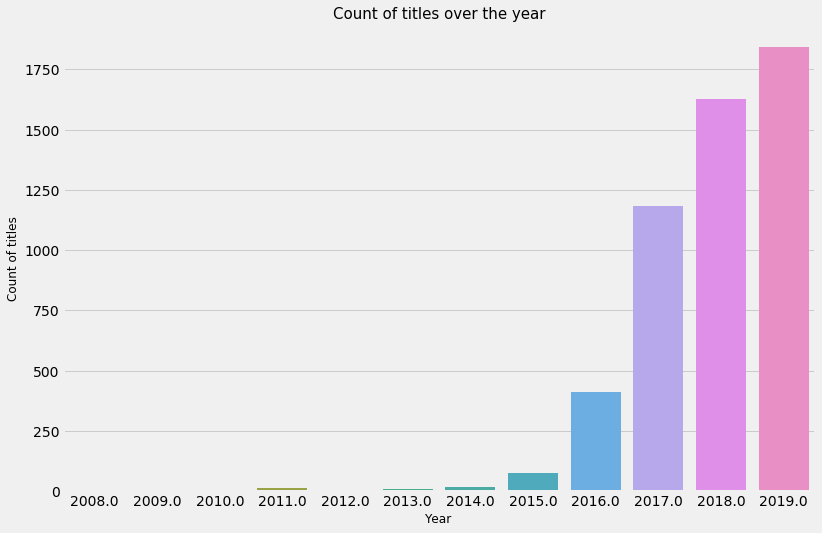

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(x='year_added',data=data)
plt.ylabel('Count of titles',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title("Count of titles over the year",fontsize=15)
plt.show()

From the plot above , we understand that the number of titles over the years have increased.Lets plot the same with respect to the type of title. - Movie or TV Show.

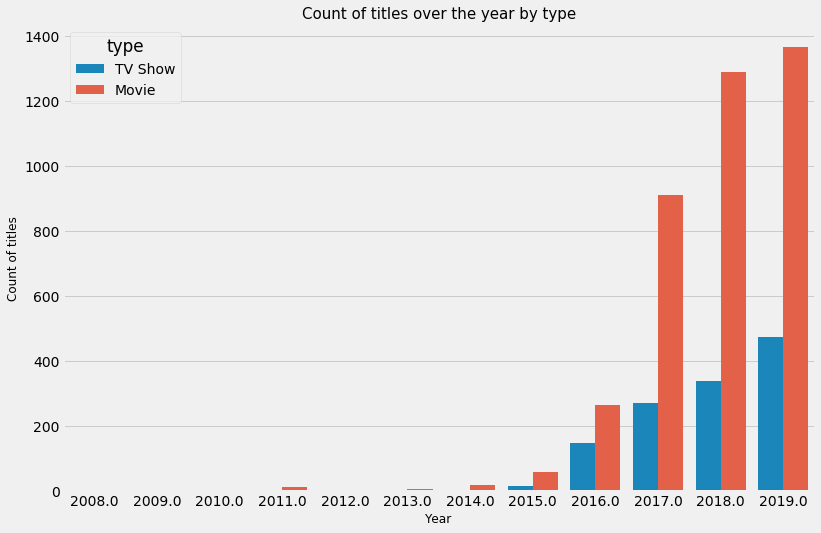

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x='year_added',data=data,hue='type')
plt.ylabel('Count of titles',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title("Count of titles over the year by type",fontsize=15)
plt.show()

Clearly , we understand that the number of tv shows added to the platform has increased over the years.Lets check the growth of the TV shows over the year and which year has seen the highest growth.

In [28]:
tvshow=data[data['type']=='TV Show']['year_added'].value_counts().sort_index()

In [29]:
tvshow.pct_change()

2008.0         NaN
2012.0    2.000000
2013.0    0.000000
2015.0    4.333333
2016.0    8.250000
2017.0    0.831081
2018.0    0.250923
2019.0    0.404130
Name: year_added, dtype: float64

There has been a 8.25 % increase in TV shows in the year 2016.

### Number of titles by month added:

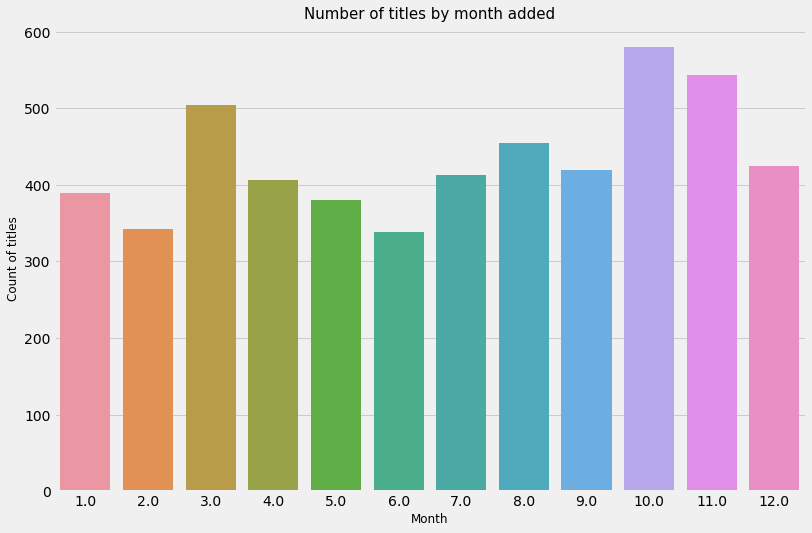

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(x='month_added',data=data)
plt.ylabel("Count of titles",fontsize=12)
plt.xlabel("Month",fontsize=12)
plt.title("Number of titles by month added",fontsize=15)
plt.show()

Maximum titles were added during the month of October followed by November and then March.Lets check whether the trend is change is different between TV show and movie title.

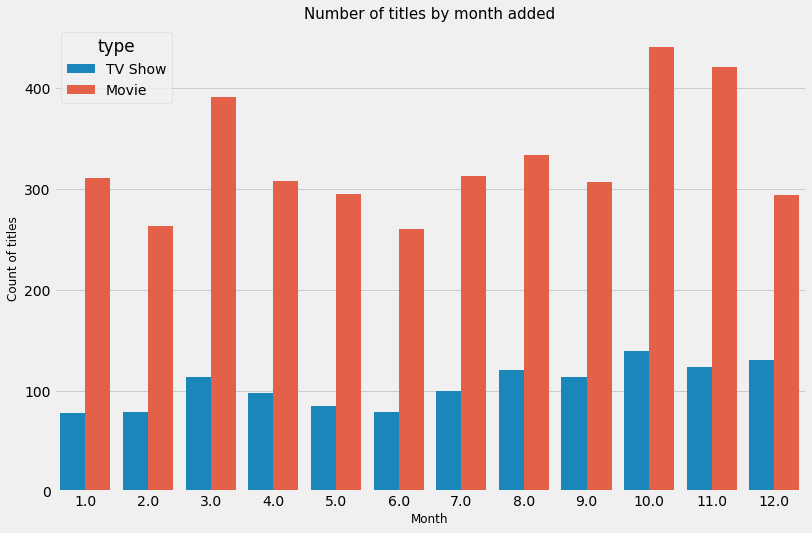

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x='month_added',data=data,hue='type')
plt.ylabel("Count of titles",fontsize=12)
plt.xlabel("Month",fontsize=12)
plt.title("Number of titles by month added",fontsize=15)
plt.show()

The trend is the same for TV show and movie titles.Oct,November and March were the months where most of the titles were added.

### Movie/TV Show Listing

From the summary of the data , there is a column called listed_in which specifies what is the genre of each of the movies.There are multiple genres for a single title.Lets check how is the genre distributed in this dataset.

In [32]:
data['listed_in']=data['listed_in'].astype('str')
data['num_listing']=data['listed_in'].apply(lambda x:len(x.split(",")))

In [33]:
listing=set()
count_listings=Counter()

for listings in data['listed_in']:
    listings=listings.split(",")
    listing.update([lst.strip() for lst in listings])
    for lst in listings:
        count_listings[lst.strip()]+=1

In [34]:
listings_title=pd.DataFrame.from_dict(count_listings,orient='index')
listings_title.sort_values(0,ascending=False,inplace=True)
listings_title.rename(columns={0:'count'},inplace=True)

In [35]:
data['num_listing'].describe()

count    5837.000000
mean        2.186568
std         0.790388
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: num_listing, dtype: float64

In [36]:
print(f'There are {len(listings_title)} genres in the database')

There are 42 genres in the database


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

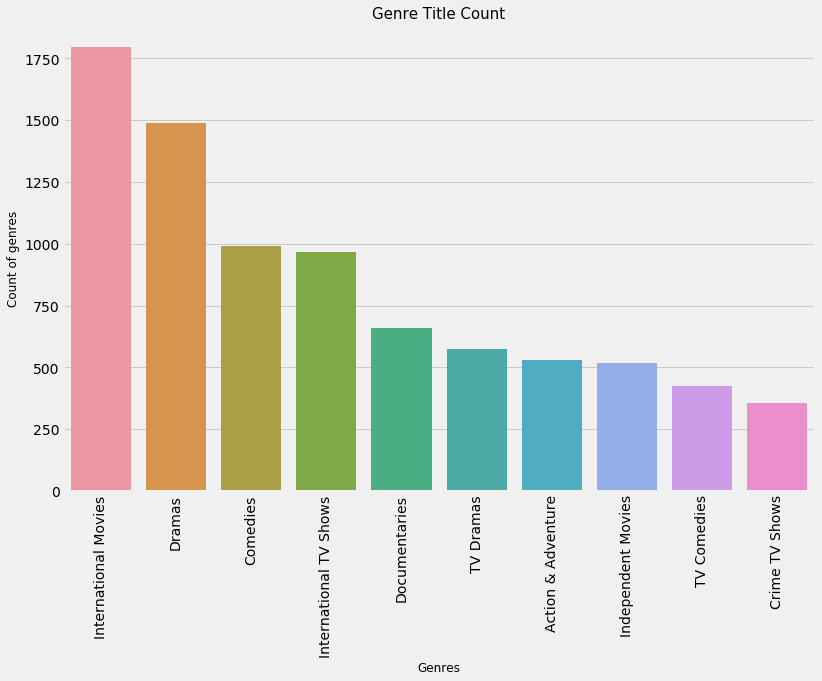

In [37]:
## Top 10 genre titles available:

plt.figure(figsize=(12,8))
sns.barplot(x=listings_title[:10].index,y='count',data=listings_title[:10])
plt.ylabel("Count of genres",fontsize=12)
plt.xlabel("Genres",fontsize=12)
plt.title("Genre Title Count",fontsize=15)
plt.xticks(rotation=90)

From the plot of top 10 genre titles available,there are more than 1750 titles listed as International Movies followed by ~1500 dramas and ~1000 comedies. 

### Countries of the titles:

It is not sure from the data description what exactly the countries column refer to -I am assuming it to be the country of origin of the title.Lets analyse this column in a similar way as that of listed_in column.

In [38]:
data['country']=data['country'].astype('str')
data['num_countries']=data['country'].apply(lambda x:len(x.split(",")))

country=set()
count_country=Counter()

for c in data['country']:
    if c not in ['nan','']:
        c=c.split(",")
        country.update([cs.strip() for cs in c])
        for cs in c:
            count_country[cs.strip()]+=1
        
        
countries_df=pd.DataFrame.from_dict(count_country,orient='index')
countries_df.sort_values(0,ascending=False,inplace=True)
countries_df.rename(columns={0:'count'},inplace=True)

In [39]:
data['num_countries'].describe()

count    5837.000000
mean        1.223745
std         0.657350
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        12.000000
Name: num_countries, dtype: float64

In [40]:
print(f'There are {len(country)} countries titles in the database')

There are 109 countries titles in the database


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

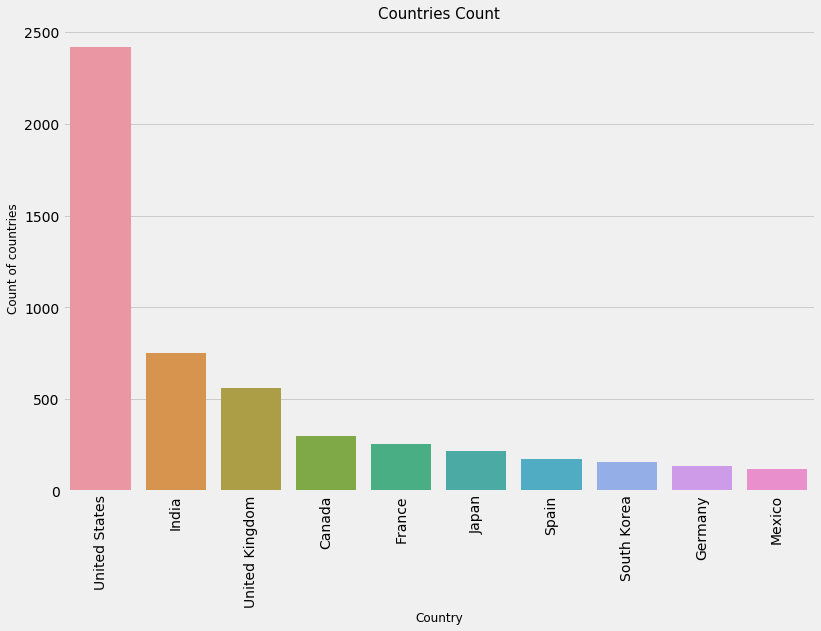

In [41]:
## Top 10 countries titles available:

plt.figure(figsize=(12,8))
sns.barplot(x=countries_df[:10].index,y='count',data=countries_df[:10])
plt.ylabel("Count of countries",fontsize=12)
plt.xlabel("Country",fontsize=12)
plt.title("Countries Count",fontsize=15)
plt.xticks(rotation=90)

* There are close to 2400 titles from United States followed by India and UK .But the difference in the number of titles of US and India is very high.

### Ratings 

In [42]:
data['rating'].value_counts()

TV-MA       1937
TV-14       1593
TV-PG        678
R            439
PG-13        227
NR           218
PG           160
TV-Y7        156
TV-G         147
TV-Y         139
TV-Y7-FV      92
G             32
UR             7
NC-17          2
Name: rating, dtype: int64

TV-MA and TV-14 are the most common ratings available in this database.Lets check the rating with respect to type.


### Rating with respect to type

In [43]:
data.groupby('type')['rating'].value_counts()

type     rating  
Movie    TV-MA       1288
         TV-14        955
         R            437
         TV-PG        413
         PG-13        227
         NR           202
         PG           160
         TV-G          79
         TV-Y7         62
         TV-Y          41
         G             31
         TV-Y7-FV      27
         UR             7
         NC-17          2
TV Show  TV-MA        649
         TV-14        638
         TV-PG        265
         TV-Y          98
         TV-Y7         94
         TV-G          68
         TV-Y7-FV      65
         NR            16
         R              2
         G              1
Name: rating, dtype: int64

There is no difference between the 1st and 2nd movie rating with respect to type.Is there any rating unique to a TV show or to a movie ?Lets check.

In [44]:
## check if there exist unique rating type in tv show 
set(data[data['type']=='TV Show'].rating.unique())-set(data[data['type']=='Movie'].rating.unique())

set()

In [45]:
#check if there exist unique movie rating type
set(data[data['type']=='Movie'].rating.unique())-set(data[data['type']=='TV Show'].rating.unique())

{'NC-17', 'PG', 'PG-13', 'UR'}

From the above output,it is seen that NC-17,PG,PG-13 and UR are only certified for movies and no tv show has this rating.

### Directors

In [46]:
## How many titles have more than one directors:
data['director']=data['director'].astype('str')
data['num_directors']=data['director'].apply(lambda x:len(x.split(",")))

In [47]:
multi_director=data.loc[data['num_directors']>1,]

In [48]:
multi_director.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added,month_added,num_listing,num_countries,num_directors
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,nan,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019.0,11.0,2,1,2
26,81177504,The Body Remembers When the World Broke Open,"Elle-Máijá Tailfeathers, Kathleen Hepburn","Violet Nelson, Elle-Máijá Tailfeathers, Charli...","Canada, Norway",2019-11-27,2019,TV-MA,106 min,"Dramas, Independent Movies","After a traumatic event, two Indigenous women ...",Movie,2019.0,11.0,2,2,2
35,81005044,What the F* Is Going On?,"Marta Jaenes, Rosa Márquez",NaN,nan,2019-11-25,2019,TV-MA,87 min,"Documentaries, International Movies","Featuring extensive interviews, this documenta...",Movie,2019.0,11.0,2,1,2
36,81218079,Awake,"Aleksandr Chernyaev, Fedor Lyass","Jonathan Rhys Meyers, Francesca Eastwood, Mali...",United States,2019-11-24,2019,TV-MA,92 min,Thrillers,After an accident leaves him with no recollect...,Movie,2019.0,11.0,1,1,2
40,60020948,Charlotte's Web,"Charles A. Nichols, Iwao Takamoto","Debbie Reynolds, Charles Nelson Reilly, Paul L...",United States,2019-11-23,1973,G,94 min,"Children & Family Movies, Classic Movies","Follow the adventures of Wilbur the pig, Templ...",Movie,2019.0,11.0,2,1,2


In [49]:
multi_director['num_directors'].value_counts().sort_index()

2     373
3      22
4      10
5       4
7       2
8       1
9       1
10      3
11      1
12      2
13      1
Name: num_directors, dtype: int64

The maximum number of directors collaborated for a movie is 13.Let us check the titles where the number of directors is more than 5.

In [50]:
multi_director.loc[multi_director['num_directors']>5,['title','director','num_directors']].sort_values(by='num_directors',ascending=False)

,title,director,num_directors
5712,Walt Disney Animation Studios Short Films Coll...,"Chris Buck, Jennifer Lee, Patrick Osborne, Lau...",13
1518,Movie 43,"Peter Farrelly, Will Graham, Steve Carr, Griff...",12
4788,HALO Legends,"Shinji Aramaki, Mamoru Oshii, Hideki Futamura,...",12
5545,X: Past Is Present,"Hemant Gaba, Pratim D. Gupta, Sudhish Kamath, ...",11
527,Sturgill Simpson Presents Sound & Fury,"Jumpei Mizusaki, Koji Morimoto, Michael Arias,...",10
3852,Don Quixote: The Ingenious Gentleman of La Mancha,"Mahin Ibrahim, Austin Kolodney, Will Lowell, D...",10
4257,Kahlil Gibran's The Prophet,"Roger Allers, Gaëtan Brizzi, Paul Brizzi, Joan...",10
5521,Holidays,"Anthony Scott Burns, Nicholas McCarthy, Adam E...",9
3690,The Heyday of the Insensitive Bastards,"Mark Columbus, Lauren Hoekstra, Sarah Kruchows...",8
745,Til Death Do Us Part,"Cho Li, Chen Hung-yi, Weica Wang, Liu Bang-yao...",7


In [51]:
###Directors with most titles:
director=data.loc[data['director']!='nan','director'].str.split(",",expand=True).stack().reset_index()
director.rename(columns={0:'director'},inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

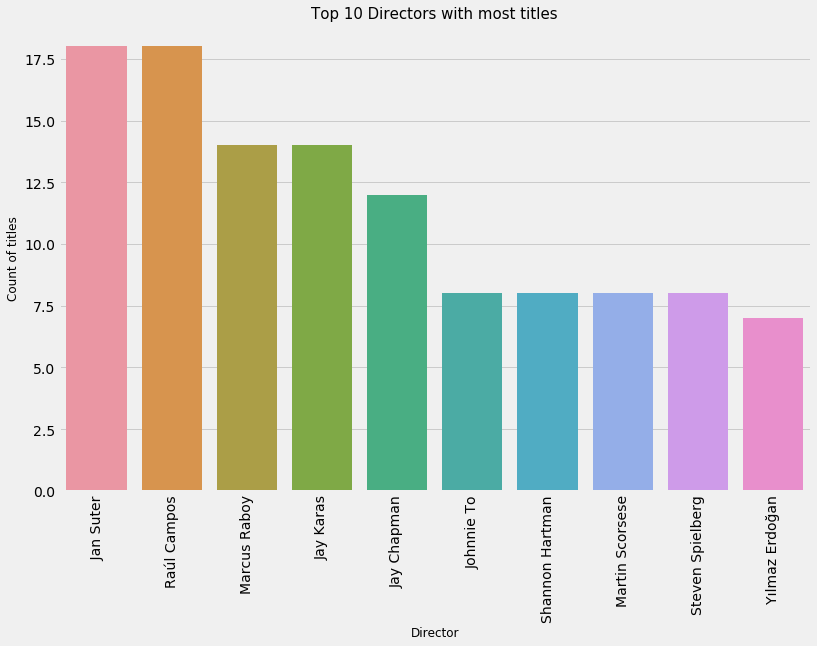

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(x=director['director'],data=director,order=director['director'].value_counts()[:10].index)
plt.xlabel("Director",fontsize=12)
plt.ylabel("Count of titles",fontsize=12)
plt.title("Top 10 Directors with most titles",fontsize=15)
plt.xticks(rotation=90)

Raul Campos and Jan Suter are the directors having 18 titles each.Lets check individually by the type of title.

In [53]:
director=data.loc[data['director']!='nan',].set_index('type').director.str.split(",",expand=True).stack().reset_index('type')
director.rename(columns={0:'directors'},inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

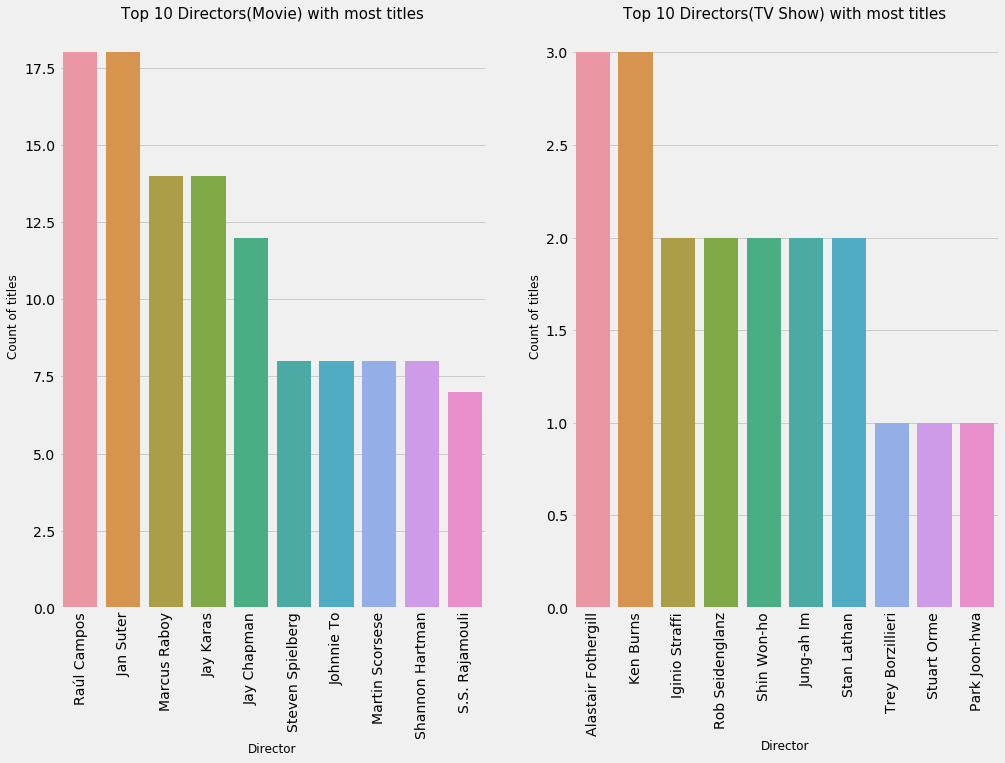

In [54]:
plt.figure(figsize=(15,10))
plt.subplot(121)
sns.countplot(x=director.loc[director['type']=='Movie','directors'],data=director[director['type']=='Movie'],order=director.loc[director['type']=='Movie','directors'].value_counts()[:10].index)
plt.xlabel("Director",fontsize=12)
plt.ylabel("Count of titles",fontsize=12)
plt.title("Top 10 Directors(Movie) with most titles",fontsize=15)
plt.xticks(rotation=90)
plt.subplot(122)
sns.countplot(x=director.loc[director['type']=='TV Show','directors'],data=director[director['type']=='TV Show'],order=director.loc[director['type']=='TV Show','directors'].value_counts()[:10].index)
plt.xlabel("Director",fontsize=12)
plt.ylabel("Count of titles",fontsize=12)
plt.title("Top 10 Directors(TV Show) with most titles",fontsize=15)
plt.xticks(rotation=90)

Analysing the top 10 list between movie and tv show , it is seen that there is no overlap between the directors.Lets check if there exist any director who have directed both a tv show and a movie.

In [55]:
### directors who have both tv show and movie title:
all_dup=director.groupby('directors')['type'].nunique()

In [56]:
all_dup[all_dup>1]

directors
 Anurag Kashyap         2
 Hiroyuki Seshita       2
 John Paul Tremblay     2
 Mike Smith             2
 Robb Wells             2
 Ronna Gradus           2
Alessandro Angulo       2
Andrew Tan              2
Anurag Basu             2
Dan Forrer              2
Daniel Kontur           2
David Ayer              2
Eli Roth                2
Jerry Seinfeld          2
Jill Bauer              2
Joe Berlinger           2
Ken Burns               2
Kobun Shizuno           2
Mario Van Peebles       2
Noam Murro              2
Oliver Stone            2
Quentin Tarantino       2
Stan Lathan             2
Tensai Okamura          2
Thomas Astruc           2
Vikramaditya Motwane    2
Name: type, dtype: int64

The above directors have both tv show and movie to their credit.